## Usage of Pig Latin scripts

The things done using pig where easy and could have been done with Python and R easily. 
Its importance lies in the fact that PIG produces sequences of Map-Reduce programs, for which large-scale parallel implementations already exist (e.g., the Hadoop subproject). [Apache Pig](https://pig.apache.org/), [Wiki.](https://en.wikipedia.org/wiki/Apache_Pig)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Datasets
Usage of 'Pig' is shown on 2 datasets. 

1. The data set used is called ‘Discussion board data’ or ‘forum data’. It is formally described as a hierarchical or tree-like in structure: a forum can contain a number of subforums, each of which may have several topics. Within a forum's topic, each new discussion started is called a thread, and can be replied to by as many people as so wish.
The data set is of online learning portal named ‘udacity’.

2. The second datasets contained sales record of various sales accross United States. 
(This data set was provided to get practical application of using big data tools)

In [13]:
# Dataset 1
forum_data = pd.read_csv('forum_node.tsv',sep = '\t')
forum_data.head()

,id,title,tagnames,author_id,body,node_type,parent_id,abs_parent_id,added_at,score,state_string,last_edited_id,last_activity_by_id,last_activity_at,active_revision_id,extra,extra_ref_id,extra_count,marked
0,5339,Whether pdf of Unit and Homework is available?,cs101 pdf,100000458,NaN,question,\N,\N,2012-02-25 08:09:06.787181+00,1,NaN,\N,100000921,2012-02-25 08:11:01.623548+00,6922,\N,\N,204,f
1,2312,Feedback on Audio Quality,cs101 production audio,100005361,<p>We are looking for feedback on the audio in...,question,\N,\N,2012-02-23 00:28:02.321344+00,2,NaN,\N,201398145,2014-01-14 17:18:35.613939+00,2960,\N,\N,524,f
2,2741,where is the sample page for homework?,cs101 missing_info homework,100001178,<p>I am sorry if I am being a nob ... but I do...,question,\N,\N,2012-02-23 09:15:02.270861+00,0,(closed),10843,100001178,2012-02-23 10:36:43.165119+00,3513,\N,\N,169,t
3,6361,When will unit 2 be online?,cs101 unit2,100003292,<p>When will unit 2 be online?</p>,question,\N,\N,2012-02-26 15:47:12.522262+00,0,(closed),51919,100003292,2012-03-03 10:12:27.41521+00,21196,\N,\N,186,t
4,7185,Hungarian group,cs101 hungarian nationalities,100003268,<p>Hi there!</p>\n<p>Any Hungarians doing the ...,question,\N,\N,2012-02-27 15:09:11.184434+00,0,NaN,\N,100003268,2012-02-27 15:09:11.184434+00,9322,\N,\N,106,f


In [14]:
forum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204617 entries, 0 to 204616
Data columns (total 19 columns):
id                     204617 non-null int64
title                  29161 non-null object
tagnames               204574 non-null object
author_id              204617 non-null int64
body                   204585 non-null object
node_type              204617 non-null object
parent_id              204617 non-null object
abs_parent_id          204617 non-null object
added_at               204617 non-null object
score                  204617 non-null int64
state_string           12553 non-null object
last_edited_id         204617 non-null object
last_activity_by_id    204617 non-null object
last_activity_at       204617 non-null object
active_revision_id     204617 non-null object
extra                  204617 non-null object
extra_ref_id           204617 non-null object
extra_count            204617 non-null int64
marked                 204617 non-null object
dtypes: int64(4), obj

In [2]:
# Dataset 2
purchases = pd.read_csv('purchases.txt',sep = '\t', names = 'Date Time Store Product Cost Payment'.split())
purchases.head()

,Date,Time,Store,Product,Cost,Payment
0,2012-01-01,09:00,San Jose,Men's Clothing,214.05,Amex
1,2012-01-01,09:00,Fort Worth,Women's Clothing,153.57,Visa
2,2012-01-01,09:00,San Diego,Music,66.08,Cash
3,2012-01-01,09:00,Pittsburgh,Pet Supplies,493.51,Discover
4,2012-01-01,09:00,Omaha,Children's Clothing,235.63,MasterCard


In [3]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4138476 entries, 0 to 4138475
Data columns (total 6 columns):
Date       object
Time       object
Store      object
Product    object
Cost       float64
Payment    object
dtypes: float64(1), object(5)
memory usage: 189.4+ MB


In [4]:
# Total Video Games Sales
# Although this very same thing in Pig was a tedious task (group, filter, create bags etc..) but worth it !!
np.sum(purchases[purchases['Product'] == 'Video Games']['Cost'])

57513165.58

### The output from the programs got stored in their respective directories
- Below cell shows one of the output generated by the program. The task was to find the maximum selling product of all the listed stores. 


In [5]:
!ls outdir

countfantastic	  mean_sale_on_sunday  product_sals	       top3sales
max_active_hours  nodecount	       question_answer_length


In [6]:
! ls outdir/top3sales

part-r-00000


In [10]:
top3 = pd.read_csv('outdir/top3sales/part-r-00000',sep = '\t', names = 'Store Product Total_sales'.split())
top3.head(15)

,Store,Product,Total_sales
0,Mesa,Toys,591139.41
1,Mesa,Men's Clothing,575801.42
2,Mesa,Women's Clothing,572868.27
3,Reno,CDs,578683.13
4,Reno,Women's Clothing,574547.56
5,Reno,Pet Supplies,570200.95
6,Boise,Crafts,591205.25
7,Boise,Men's Clothing,585786.82
8,Boise,Garden,582684.18
9,Miami,Cameras,572410.78


In [11]:
temp = top3.groupby('Product', as_index = False).sum()
temp

,Product,Total_sales
0,Baby,8100071.65
1,Books,7498316.43
2,CDs,12141426.99
3,Cameras,8067246.37
4,Children's Clothing,12703222.37
5,Computers,9784806.90
6,Consumer Electronics,11518978.53
7,Crafts,7476823.67
8,DVDs,11564100.30
9,Garden,8675788.46


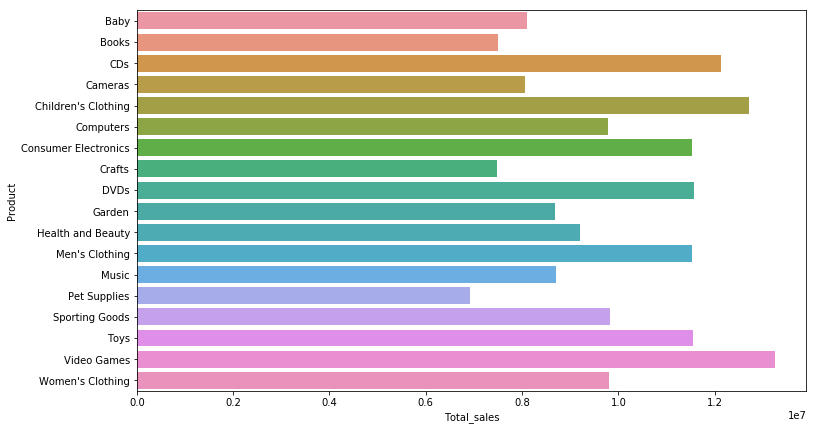

In [13]:
plt.figure(figsize=(12,7))
sns.barplot(x = 'Total_sales',y = 'Product',data = temp,estimator=np.sum, ci = None)